In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Arc
from matplotlib.lines import Line2D

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from sklearn.metrics.pairwise import cosine_similarity


In [3]:
def find_angle(line1, line2):
    line1_xy = line1.get_xydata()

    line1_x = line1_xy[1][0]
    line1_y = line1_xy[1][1]

    angle_line1 = np.rad2deg(math.atan(line1_y / line1_x))

    line2_xy = line2.get_xydata()

    line2_x = line2_xy[1][0]
    line2_y = line2_xy[1][1]

    angle_line2 = np.rad2deg(math.atan(line2_y / line2_x))

    theta1 = min(angle_line1, angle_line2)
    theta2 = max(angle_line1, angle_line2)

    return theta1, theta2, theta2 - theta1

In [4]:
movie_df = pd.DataFrame(
    [
        ["Julie", 4, 5, 2],
        ["Sal", 1, 2, 5],
        ["Matthew", 4, 4, 2],
    ],
    columns=["Name", "2001: A Space Odyssey", "Fargo", "Sense and Sensibility"],
)

movie_df = movie_df.set_index("Name")
movie_df.head()


,2001: A Space Odyssey,Fargo,Sense and Sensibility
Name,,,
Julie,4,5,2
Sal,1,2,5
Matthew,4,4,2


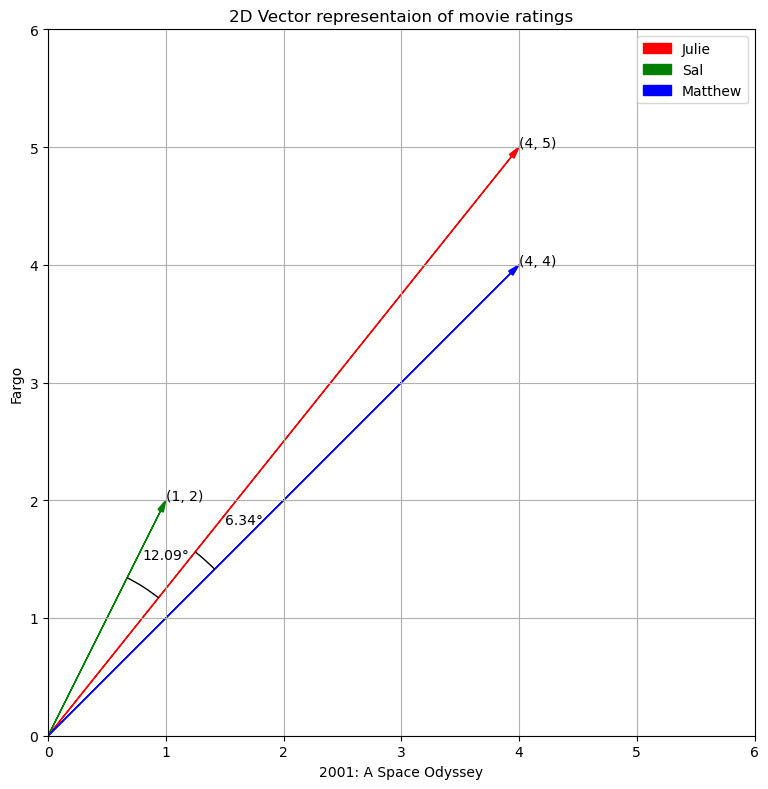

In [5]:
f, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=100)
ax.set_aspect("equal", adjustable="box")

plt.xlim([0, 6])
plt.ylim([0, 6])

ax.arrow(
    0,
    0,
    movie_df[["2001: A Space Odyssey"]].iloc[0][0],
    movie_df[["Fargo"]].iloc[0][0],
    head_width=0.05,
    head_length=0.1,
    length_includes_head=True,
    fc="r",
    ec="r",
    label="Julie",
)
ax.arrow(
    0,
    0,
    movie_df[["2001: A Space Odyssey"]].iloc[1][0],
    movie_df[["Fargo"]].iloc[1][0],
    head_width=0.05,
    head_length=0.1,
    length_includes_head=True,
    fc="g",
    ec="g",
    label="Sal",
)
ax.arrow(
    0,
    0,
    movie_df[["2001: A Space Odyssey"]].iloc[2][0],
    movie_df[["Fargo"]].iloc[2][0],
    head_width=0.05,
    head_length=0.1,
    length_includes_head=True,
    fc="b",
    ec="b",
    label="Matthew",
)

# Draw lines identical to arrows to use them for angle calculation
line_1 = Line2D(
    [0, movie_df[["2001: A Space Odyssey"]].iloc[0][0]],
    [0, movie_df[["Fargo"]].iloc[0][0]],
    color="red",
)
line_2 = Line2D(
    [0, movie_df[["2001: A Space Odyssey"]].iloc[1][0]],
    [0, movie_df[["Fargo"]].iloc[1][0]],
    color="green",
)
line_3 = Line2D(
    [0, movie_df[["2001: A Space Odyssey"]].iloc[2][0]],
    [0, movie_df[["Fargo"]].iloc[2][0]],
    color="blue",
)

# Calculate angle between lines
theta_1, theta_2, theta_diff = find_angle(line_1, line_2)
arc_1 = Arc(
    (0, 0), 3, 3, angle=theta_1, theta1=0, theta2=theta_diff, linewidth=1, fill=False
)
angle_1 = theta_diff

theta_1, theta_2, theta_diff = find_angle(line_1, line_3)
arc_2 = Arc(
    (0, 0), 4, 4, angle=theta_1, theta1=0, theta2=theta_diff, linewidth=1, fill=False
)
angle_2 = theta_diff

# Display the angles arches
ax.add_patch(arc_1)
ax.add_patch(arc_2)

# Display the angles values
ax.text(x=0.8, y=1.5, s="%0.2f" % float(angle_1) + "\u00b0")
ax.text(x=1.5, y=1.8, s="%0.2f" % float(angle_2) + "\u00b0")


ax.text(
    x=movie_df[["2001: A Space Odyssey"]].iloc[0][0],
    y=movie_df[["Fargo"]].iloc[0][0],
    s=f"({movie_df[['2001: A Space Odyssey']].iloc[0][0]}, {movie_df[['Fargo']].iloc[0][0]})",
)
ax.text(
    x=movie_df[["2001: A Space Odyssey"]].iloc[1][0],
    y=movie_df[["Fargo"]].iloc[1][0],
    s=f"({movie_df[['2001: A Space Odyssey']].iloc[1][0]}, {movie_df[['Fargo']].iloc[1][0]})",
)
ax.text(
    x=movie_df[["2001: A Space Odyssey"]].iloc[2][0],
    y=movie_df[["Fargo"]].iloc[2][0],
    s=f"({movie_df[['2001: A Space Odyssey']].iloc[2][0]}, {movie_df[['Fargo']].iloc[2][0]})",
)

ax.set_title("2D Vector representaion of movie ratings")
ax.set_xlabel("2001: A Space Odyssey")
ax.set_ylabel("Fargo")

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()


In [6]:
item_matrix = movie_df.values
user_mean = item_matrix.mean(axis=1)
# user_mean = item_matrix.mean(axis=0)

np.set_printoptions(precision=2)
adjusted_matrix = item_matrix - user_mean[:, None]
# adjusted_matrix = item_matrix - user_mean

# Regular cosine similarity - no mean adjusted
print(cosine_similarity(item_matrix))
print()
# Adjusted cosine similarity - user mean subtracted from ratings
print(cosine_similarity(adjusted_matrix))


[[1.   0.65 0.99]
 [0.65 1.   0.67]
 [0.99 0.67 1.  ]]

[[ 1.   -0.84  0.94]
 [-0.84  1.   -0.97]
 [ 0.94 -0.97  1.  ]]


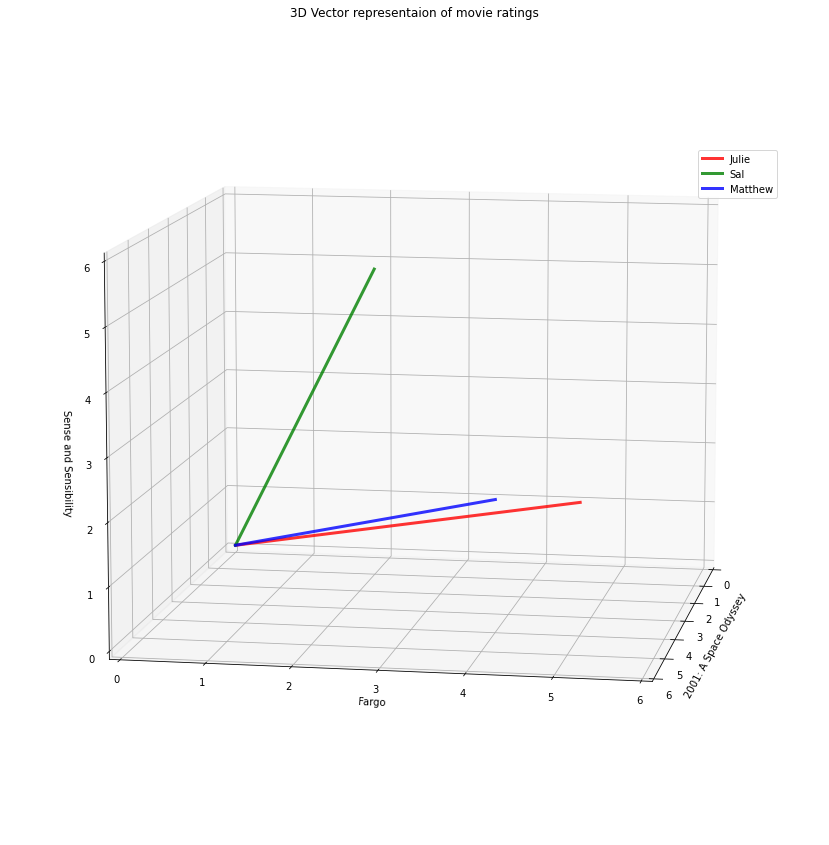

In [7]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])

x = np.squeeze(movie_df[["2001: A Space Odyssey"]].values)
y = np.squeeze(movie_df[["Fargo"]].values)
z = np.squeeze(movie_df[["Sense and Sensibility"]].values)

colors = ["r", "g", "b"]
labels = ["Julie", "Sal", "Matthew"]

for i in range(len(x)):
    ax.plot(
        [0, x[i]],
        [0, y[i]],
        [0, z[i]],
        color=colors[i],
        alpha=0.8,
        lw=3,
        label=labels[i],
    )

ax.view_init(10, 10)

ax.set_title("3D Vector representaion of movie ratings")
ax.set_xlabel("2001: A Space Odyssey")
ax.set_ylabel("Fargo")
ax.set_zlabel("Sense and Sensibility")

plt.rcParams["axes.titley"] = 1.1  # y is in axes-relative coordinates.
plt.rcParams["axes.titlepad"] = 1  # pad is in points...

plt.legend(loc="best", bbox_to_anchor=(0.6, 0.3, 0.35, 0.55))
plt.grid()
plt.savefig("cosine_similarity_3d.png")
plt.show()


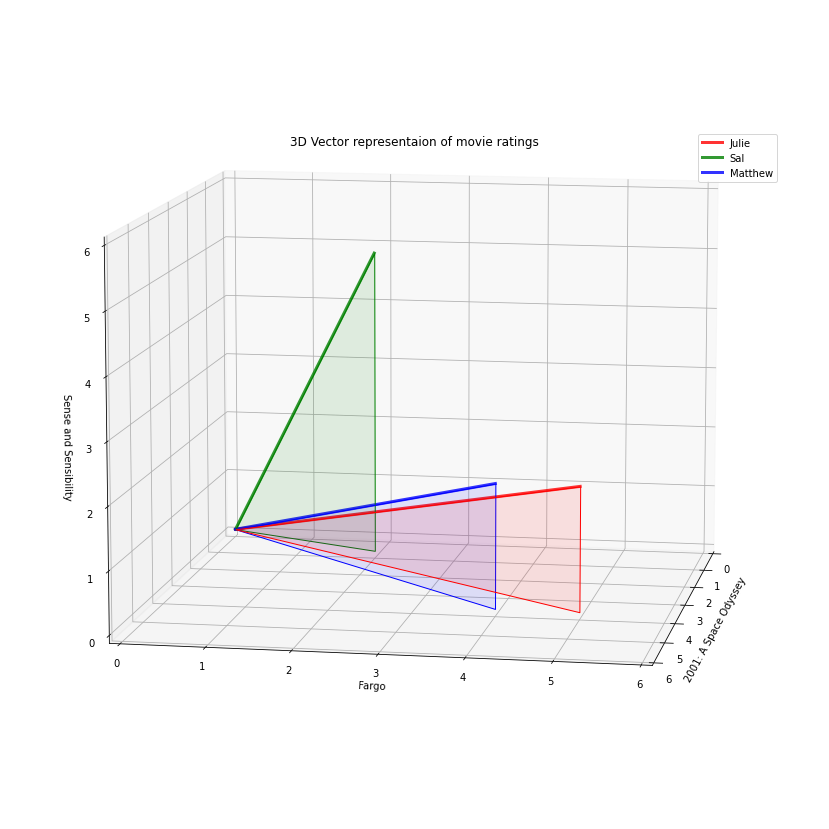

In [10]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])

x = np.squeeze(movie_df[["2001: A Space Odyssey"]].values)
y = np.squeeze(movie_df[["Fargo"]].values)
z = np.squeeze(movie_df[["Sense and Sensibility"]].values)

colors = ["r", "g", "b"]
labels = ["Julie", "Sal", "Matthew"]

for i in range(len(x)):
    ax.plot(
        [0, x[i]],
        [0, y[i]],
        [0, z[i]],
        color=colors[i],
        alpha=0.8,
        lw=3,
        label=labels[i],
    )

    x_t = [0, x[i], x[i]]
    y_t = [0, y[i], y[i]]
    z_t = [0, z[i], 0]

    verts = [list(zip(x_t,y_t,z_t))]
    triangle = Poly3DCollection(verts)
    triangle.set_color(colors[i])
    triangle.set_alpha(0.1)

    ax.add_collection3d(triangle)

ax.view_init(10, 10)

ax.set_title("3D Vector representaion of movie ratings")
ax.set_xlabel("2001: A Space Odyssey")
ax.set_ylabel("Fargo")
ax.set_zlabel("Sense and Sensibility")

plt.rcParams["axes.titley"] = 1.9  # y is in axes-relative coordinates.
plt.rcParams["axes.titlepad"] = 1  # pad is in points...

plt.legend(loc="best", bbox_to_anchor=(0.6, 0.3, 0.35, 0.55))
plt.grid()
plt.savefig("cosine_similarity_3d_shaded.png")
plt.show()


In [273]:
def cart2sphere(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z, r)
    phi = np.arctan2(y, x)
    return(r, theta, phi)

def sphere2cart(r, theta, phi):
    theta = theta - np.pi/2
    x = r * np.sin(theta)* np.cos(phi) + 1
    y = r * np.sin(theta)* np.sin(phi) + 1
    z = r * np.cos(theta) + 1
    return(x, y, z)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

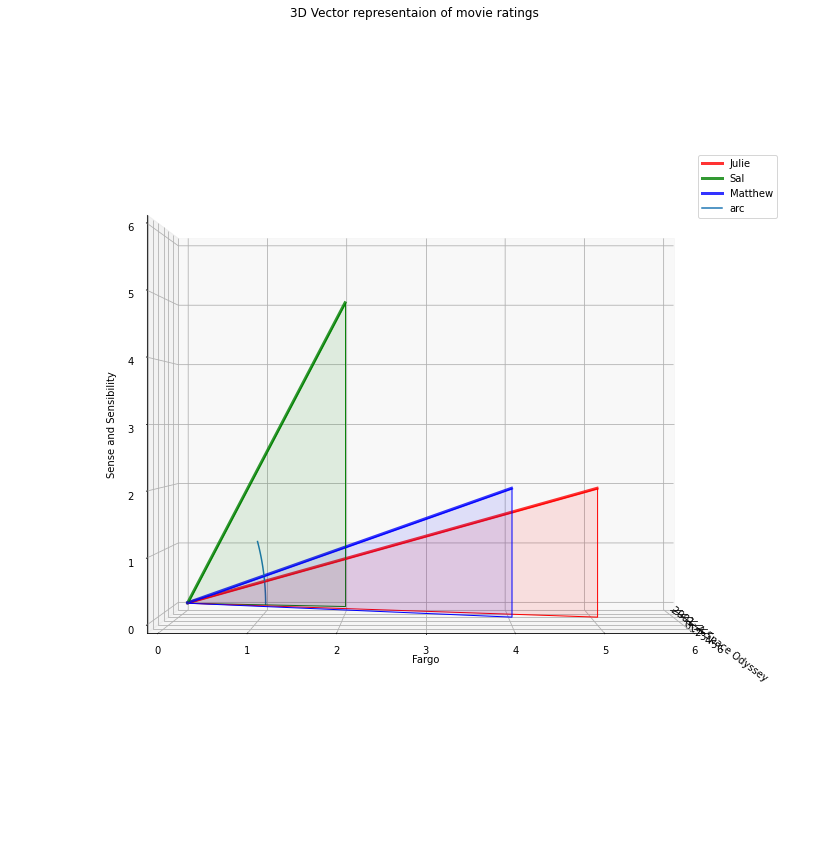

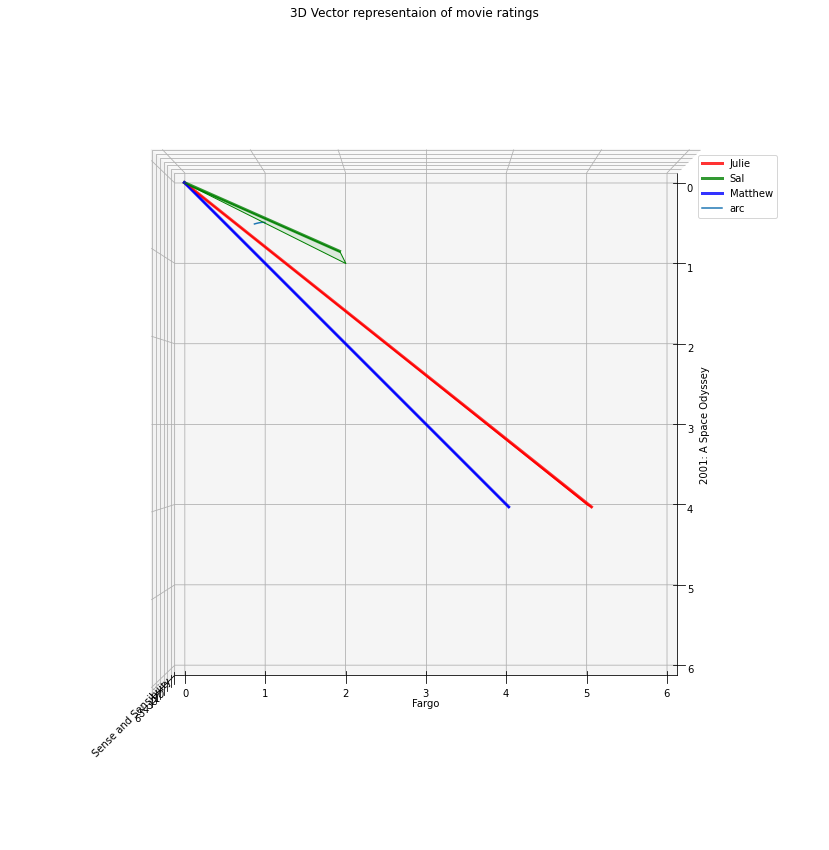

In [288]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])

x = np.squeeze(movie_df[["2001: A Space Odyssey"]].values)
y = np.squeeze(movie_df[["Fargo"]].values)
z = np.squeeze(movie_df[["Sense and Sensibility"]].values)

colors = ["r", "g", "b"]
labels = ["Julie", "Sal", "Matthew"]

for i in range(len(x)):
    ax.plot(
        [0, x[i]],
        [0, y[i]],
        [0, z[i]],
        color=colors[i],
        alpha=0.8,
        lw=3,
        label=labels[i],
    )

    x_t = [0, x[i], x[i]]
    y_t = [0, y[i], y[i]]
    z_t = [0, z[i], 0]

    verts = [list(zip(x_t,y_t,z_t))]
    triangle = Poly3DCollection(verts)
    triangle.set_color(colors[i])
    triangle.set_alpha(0.1)

    ax.add_collection3d(triangle)

theta_1, theta_2, theta_diff = find_angle(line_1, line_2)
angle_1 = theta_diff

theta_1, theta_2, theta_diff = find_angle(line_1, line_3)
angle_2 = theta_diff

# theta = np.deg2rad(angle_1) # arclength in radians
theta = np.deg2rad(angle_1) # arclength in radians
radius = 5
phi = -np.arctan(2) # modify this to move circle around 0, 0, 0 axis (angle is 2 for green line - calculations on iPad)


def sphere2cart(r, theta, phi, center):
    theta = theta - np.pi/2
    x = r * np.sin(theta)* np.cos(phi) + center[0]
    y = r * np.sin(theta)* np.sin(phi) + center[1]
    z = r * np.cos(theta) + center[2]
    return(x, y, z)

center = [0.5, 1, 0]

arcIndex = np.linspace(0, theta, num = 100)
X, Y, Z, = sphere2cart(radius, arcIndex, phi, center)

x1, y1 = pol2cart(radius, phi)
X += x1
Y += y1

ax.plot(X, Y, Z, label='arc')

ax.view_init(0, 0)

ax.set_title("3D Vector representaion of movie ratings")
ax.set_xlabel("2001: A Space Odyssey")
ax.set_ylabel("Fargo")
ax.set_zlabel("Sense and Sensibility")

plt.rcParams["axes.titley"] = 1.1  # y is in axes-relative coordinates.
plt.rcParams["axes.titlepad"] = 1  # pad is in points...

plt.legend(loc="best", bbox_to_anchor=(0.6, 0.3, 0.35, 0.55))
plt.grid()
plt.savefig("cosine_similarity_3d.png")
plt.show()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])

for i in range(len(x)):
    ax.plot(
        [0, x[i]],
        [0, y[i]],
        [0, z[i]],
        color=colors[i],
        alpha=0.8,
        lw=3,
        label=labels[i],
    )

    x_t = [0, x[i], x[i]]
    y_t = [0, y[i], y[i]]
    z_t = [0, z[i], 0]

    verts = [list(zip(x_t,y_t,z_t))]
    triangle = Poly3DCollection(verts)
    triangle.set_color(colors[i])
    triangle.set_alpha(0.1)

    ax.add_collection3d(triangle)

arcIndex = np.linspace(0, theta, num = 100)

X, Y, Z, = sphere2cart(radius, arcIndex, phi, center)

x1, y1 = pol2cart(radius, phi)
X += x1
Y += y1

ax.plot(X, Y, Z, label='arc')

ax.view_init(90, 0)

ax.set_title("3D Vector representaion of movie ratings")
ax.set_xlabel("2001: A Space Odyssey")
ax.set_ylabel("Fargo")
ax.set_zlabel("Sense and Sensibility")

plt.rcParams["axes.titley"] = 1.1  # y is in axes-relative coordinates.
plt.rcParams["axes.titlepad"] = 1  # pad is in points...

plt.legend(loc="best", bbox_to_anchor=(0.6, 0.3, 0.35, 0.55))
plt.grid()
plt.savefig("cosine_similarity_3d.png")
plt.show()

In [244]:
np.rad2deg(np.arctan(2))

63.43494882292202